<a href="https://colab.research.google.com/github/HyeonhoonLee/TSA_pandas/blob/master/04_Rolling_and_Expanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rolling & Expanding
- 매일 수집한 데이터들에는 노이즈가 포함되기도 합니다
- 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean (또는 moving aveage) 을 사용하기도 합니다.
- Pandas에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균 (rolling mean) 등을 구할 수 있습니다.
- 임의 시간 간격의 window를 만들고 그 안에서 mean 같은 통계적 aggregation을 실행하면 됩니다.

- Expanding은 시점이 고정된 상태에서 window 사이즈를 확장하는 것.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 시계열 데이터를 인덱스와 함께 읽는 방법
df = pd.read_csv('/content/drive/My Drive/Tacademy/TSA_pandas/data/apple_stock.csv', 
                 index_col='Date', parse_dates=True)
## parse_dates=True 은 date로 parsing 할 수 있는 column은 발견하면 
##datetime 형태로 변환해주는 것.

In [4]:
# 더 정확히 하려면, 아예 parsing하는 column을 지정해준다.
df = pd.read_csv('/content/drive/My Drive/Tacademy/TSA_pandas/data/apple_stock.csv', 
                 index_col='Date', parse_dates=['Date'])

In [5]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


- 위와 같이 parsing이 되지 않는 게 있다면 (예를 들어 2019-Jan-01, 19-01-01 등은 parsing 안됨.),

- 저장된 시간 형식을 임의로 지정해서 datetime 형태로 데이터 읽어오기

In [7]:
# 시간 형식 지정 ; strftime.org 참조
## strptime은 string parse time의 약어로, string 인자를 받아서 지정한 형태로 바꿔줌. 
## str_dt는 그냥 변수명;;
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d")

# TEST
dateparser('2019-01-01')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


datetime.datetime(2019, 1, 1, 0, 0)

In [8]:
# 'Date' column에 쓰인 날짜 형식을 참고하여
# 여러 가지 형태를 일정한 datetime으로 읽을 수 있도록 여러 함수를 만들어준다.
def dateparser2(str_dt):
    return pd.datetime.strptime(str_dt, "%m-%d-%Y")

# TEST
dateparser2('01-01-2019')
## 위와 똑같은 datetime임을 확인할 수 있다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


datetime.datetime(2019, 1, 1, 0, 0)

In [9]:
# putting all together
df = pd.read_csv('/content/drive/My Drive/Tacademy/TSA_pandas/data/apple_stock.csv',
                 index_col='Date',
                 parse_dates=['Date'],
                 date_parser=dateparser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


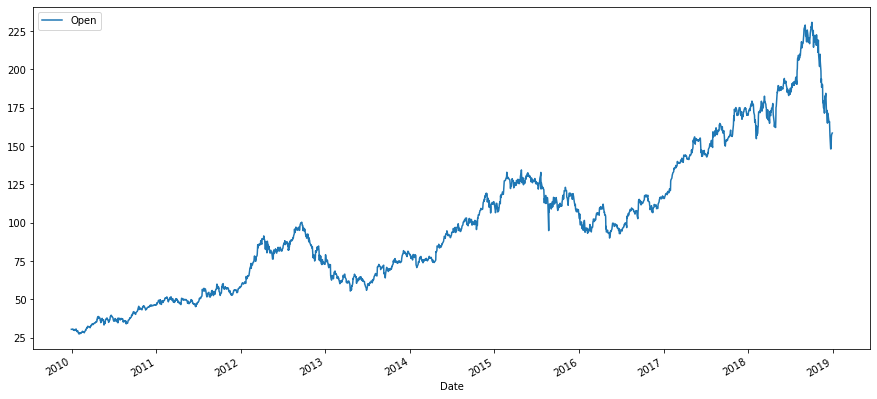

In [10]:
# Open 칼럼 시각화
df[['Open']].plot(figsize=(15,7))

**rolling** 메서드는 일정 시간구간의 윈도우를 row 엔트리로 만들어냅니다.

In [11]:
# 7 day rolling mean
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


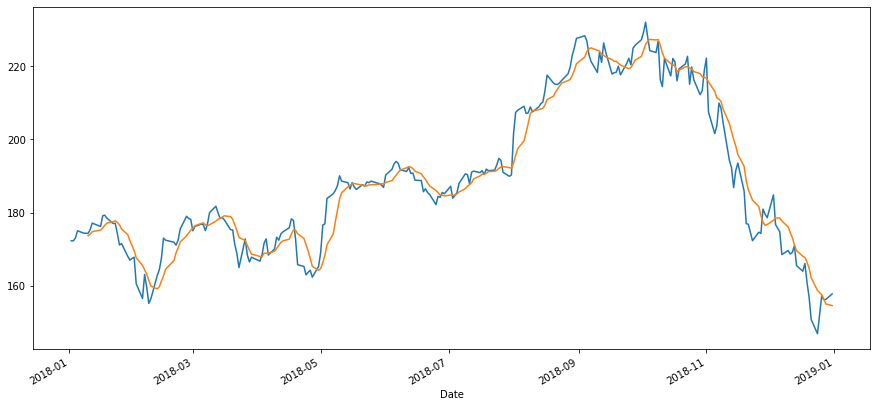

In [12]:
# Close 칼럼 실제 값과 7일치 rolling mean 을 함께 시각화 합니다.
df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot(figsize=(15,7))

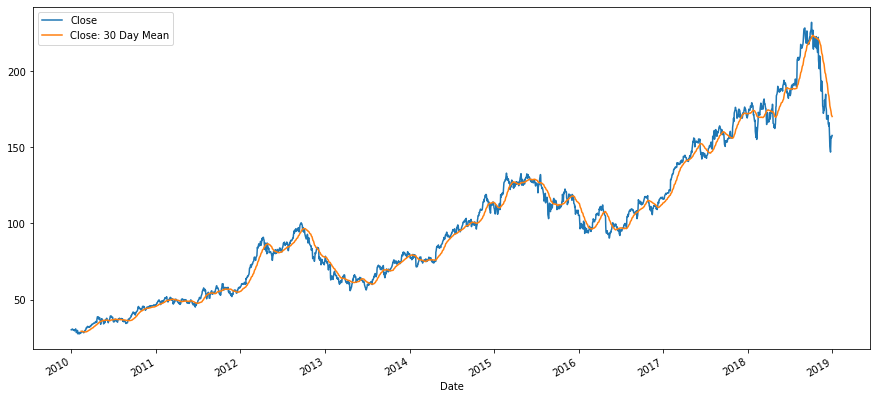

In [13]:
# 데이터프레임에 rolling mean 결과를 별도 칼럼으로 추가한 후 plotting 하면 pandas 는 칼럼 이름으로 범례(legend)를 만들어줍니다.
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,7))
## 나중에 볼린저 밴드 그릴 때 참고할 것!

## expanding
rolling mean 을 시간간격에 국한시키지 않고 시계열 데이터의 시작점부터 넓혀가며 구하려면 **expanding** 메서드를 사용합니다.

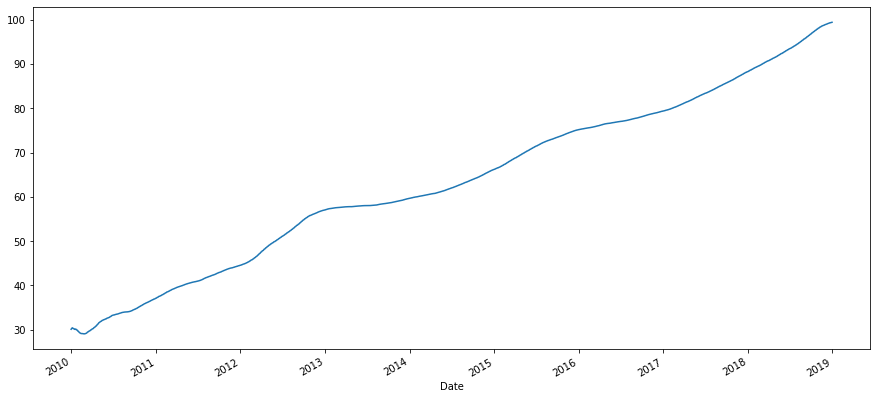

In [14]:
# min_periods : 최소 주기 설정
# 종가에 대한 누적평균.
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))

Quiz: 20일 볼린저밴드 그려보기

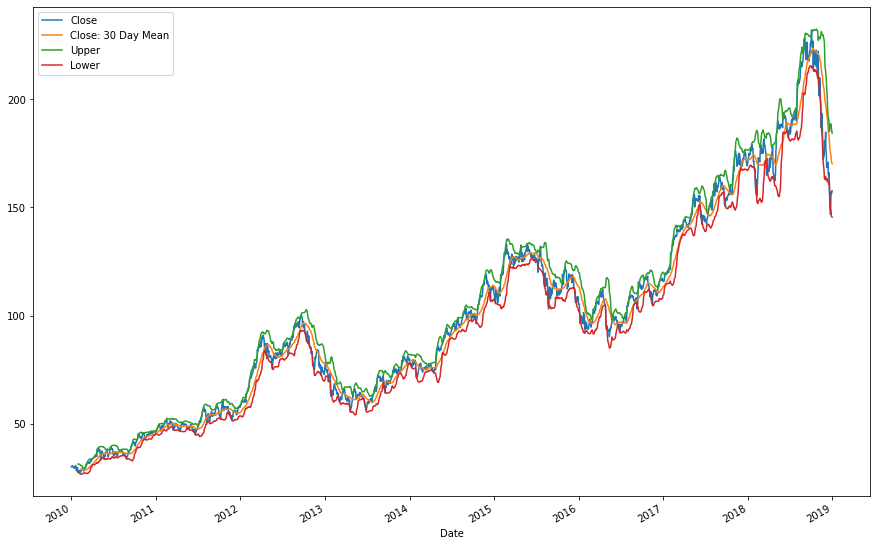

In [17]:
df['Close: 20Day Mean'] = df['Close'].rolling(20).mean()
df['Upper'] = df['Close: 20Day Mean']+df['Close'].rolling(20).agg('std')*2
df['Lower'] = df['Close: 20Day Mean']-df['Close'].rolling(20).agg('std')*2
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(15,10))

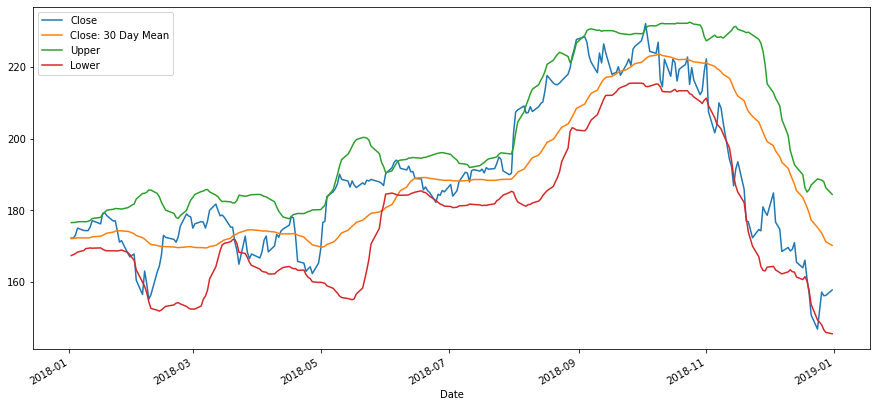

In [18]:
# 만약 위 그림을 2018년 이후만 보고싶다면,
df['2018':][['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(15,7))